### La régression polynomiale est une extension de la régression linéaire qui permet de modéliser des relations non linéaires entre la variable dépendante et les variables indépendantes. Au lieu d'assumer une relation linéaire, la régression polynomiale utilise des polynômes pour ajuster le modèle aux données.

### Dataset: https://www.kaggle.com/gurdit559/canada-per-capita-income-single-variable-data-set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv('canada_per_capita_income.csv')

In [4]:
X = data.iloc[:,:-1]

In [5]:
Y = data.iloc[:,-1]

In [6]:
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


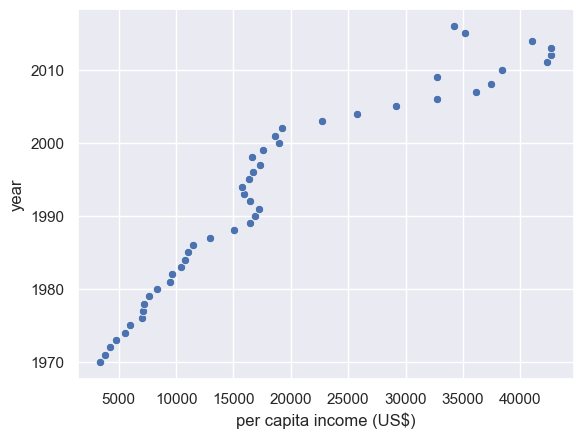

In [7]:
sns.scatterplot(data=data, x='per capita income (US$)', y='year')
plt.show()

### Train test split

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

### Modèle de régression linéaire polynomiale

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()

In [15]:
poly = PolynomialFeatures(degree = 2)

In [16]:
X_train_poly = poly.fit_transform(X_train)

In [17]:
model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prédiction

In [18]:
X_test_poly = poly.fit_transform(X_test)
y_pred = model.predict(X_test_poly)

In [19]:
print(y_pred)

[17658.03388914 15942.21795475 34259.9736909  29188.6089872
  5225.8661764   5483.51480225 22459.99023606 25692.53536597
 42745.44905087 19490.97359746]


### Comparaison

In [20]:
comparaison = pd.DataFrame()
comparaison['Actual'] = y_test
comparaison['predicted'] = y_pred

In [21]:
comparaison

,Actual,predicted
24,15755.820270,17658.033889
22,16412.083090,15942.217955
39,32755.176820,34259.973691
35,29198.055690,29188.608987
2,4251.175484,5225.866176
3,4804.463248,5483.514802
29,17581.024140,22459.990236
32,19232.175560,25692.535366
45,35175.188980,42745.449051
26,16699.826680,19490.973597


In [21]:
comparision

,Actual,predicted
24,15755.820270,17658.033889
22,16412.083090,15942.217955
39,32755.176820,34259.973691
35,29198.055690,29188.608987
2,4251.175484,5225.866176
3,4804.463248,5483.514802
29,17581.024140,22459.990236
32,19232.175560,25692.535366
45,35175.188980,42745.449051
26,16699.826680,19490.973598


### Evaluation

In [22]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.861584425371354

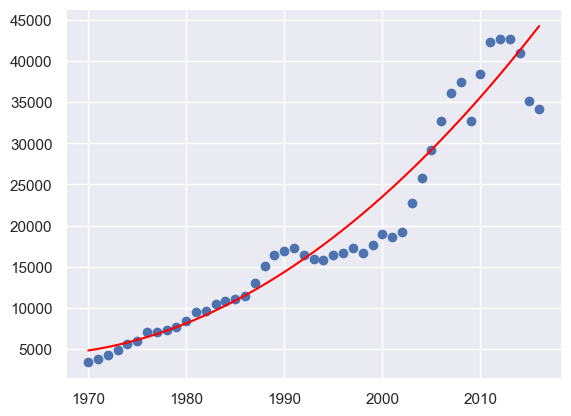

In [26]:
plt.scatter(X, Y)
plt.plot(X, model.predict(poly.fit_transform(X)), color='red')
plt.show()

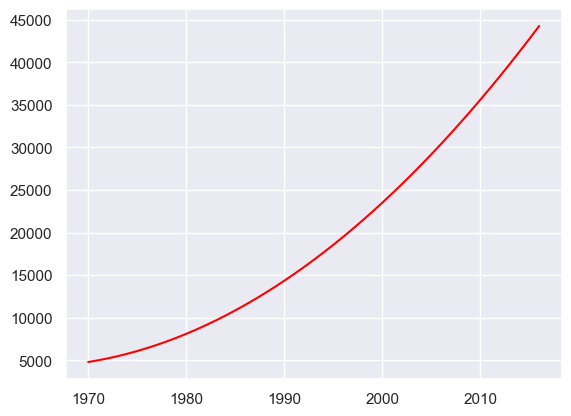

In [28]:
plt.plot(X, model.predict(poly.fit_transform(X)), color='red')
plt.show()

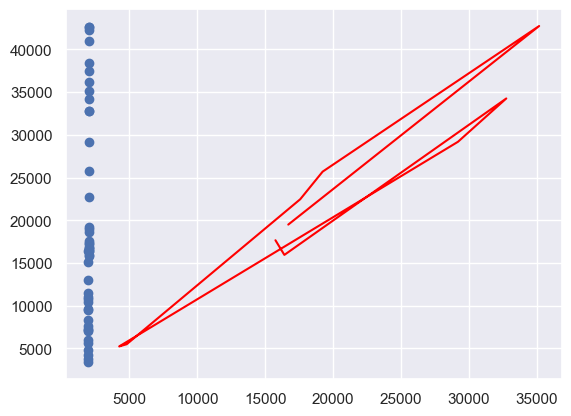

In [38]:
plt.scatter(X, Y)
plt.plot(y_test, y_pred, color='red')
plt.show()